## Used Vehicles Analysis and Price Prediction

* About the data set:

  * This data set is used vehicles data publically available on https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data
 

* Description of data attributes:
  * 'year':  model year of a vehicle | int32 
  * 'manufacturer':  maker of a vehicle | categorical
  * 'cylinder':  cylinder size of a vehicle | categorical
  * 'type':  body type of a vehicle | categorical
  * 'paint_color':  color of a vehicle | categorical
  * 'region': region where the vehicle was listed | categorical
  * 'state':  state where the vehicle was listed | categorical
  *  'price': listing price on Craigslist.org | float
* In descriptic analysis, I explore which feature group(s) of vehicles have greater impact on listing prices, then followed with a correlation analysis of numerical varialbes(including converted categorical variable to numeric variable).

* In inferential analysis, I use the linear regression machine learning method to build five models, selecting the most accurate one to predict the price of used vehicles as desired.




# Part 1: Import necessary libraries, load data, and check data types and structures

In [20]:

# Import necessary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols



In [21]:
# Load dataset:
df = pd.read_csv('vehicles.csv', header=0)

# remove white space from cell and header
df = df.apply(lambda x: x.astype(str).str.strip() if x.dtype == "object" else x)
df.columns=df.columns.str.strip()


In [22]:

# check column names, data types, total observations:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  426880 non-null  object 
 7   model         426880 non-null  object 
 8   condition     426880 non-null  object 
 9   cylinders     426880 non-null  object 
 10  fuel          426880 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  426880 non-null  object 
 13  transmission  426880 non-null  object 
 14  VIN           426880 non-null  object 
 15  drive         426880 non-null  object 
 16  size          426880 non-null  object 
 17  type          426880 non-null  object 
 18  pain

In [127]:
# A list of vehicles' model year for sale:
df.year.unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [129]:
# check null values:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer          4400
title_status         0
transmission         0
VIN                  0
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          0
county          426880
state                0
lat               6549
long              6549
posting_date         0
dtype: int64

# Part 2: Preprocess the data

In [131]:

# Drop columns that won't be useful for this analysis:
df.drop(columns =['id','url','region_url','model','condition','VIN','image_url','county','transmission','title_status','size','description','posting_date'], axis=1, inplace=True)


In [132]:

# Remove rows that impact accuracy of the analysis:
df= df[(df.price >= 2000) & (df.price <=500000) & (df.year >=1970)& (df.year < 2022) &(df.odometer<300000) & (df.odometer>500)]


In [133]:

# Remove null values in the cells:
df=df.dropna(subset=['lat','long','drive','lat','long'])


In [152]:

# Remove 'nan' strings in those cells:
df=df[(df.year!='nan')&(df.price !='nan')&(df.manufacturer !='nan')&(df.cylinders !='nan')&(df.fuel !='nan')&(df.odometer!='nan')&(df.drive!='nan')&(df.type!='nan')&(df.paint_color!='nan')]

# Recheck total observations:
df.shape


(137469, 13)

In [154]:

# Change data type for year column:
df.year=df.year.astype(int)


# Part 3: Descriptive statistics analysis

In [157]:
# re-check data structure and data types:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 137469 entries, 31 to 426878
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        137469 non-null  object 
 1   price         137469 non-null  int64  
 2   year          137469 non-null  int32  
 3   manufacturer  137469 non-null  object 
 4   cylinders     137469 non-null  object 
 5   fuel          137469 non-null  object 
 6   odometer      137469 non-null  float64
 7   drive         137469 non-null  object 
 8   type          137469 non-null  object 
 9   paint_color   137469 non-null  object 
 10  state         137469 non-null  object 
 11  lat           137469 non-null  float64
 12  long          137469 non-null  float64
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 14.2+ MB


In [159]:
# Re-check missing values:
df.isnull().sum()

region          0
price           0
year            0
manufacturer    0
cylinders       0
fuel            0
odometer        0
drive           0
type            0
paint_color     0
state           0
lat             0
long            0
dtype: int64

In [161]:

# re-check statistical summary:
df.describe()


,price,year,odometer,lat,long
count,137469.000000,137469.000000,137469.000000,137469.000000,137469.000000
mean,17773.750198,2011.044701,101588.451171,38.634585,-94.335534
std,13732.483014,7.051118,59477.895554,5.984344,18.450910
min,2000.000000,1970.000000,501.000000,-81.838232,-159.719900
25%,7400.000000,2008.000000,53000.000000,34.969253,-110.801411
50%,13800.000000,2013.000000,99095.000000,39.444084,-88.105874
75%,25590.000000,2016.000000,142000.000000,42.402459,-80.406800
max,289995.000000,2021.000000,299999.000000,82.252826,139.691700


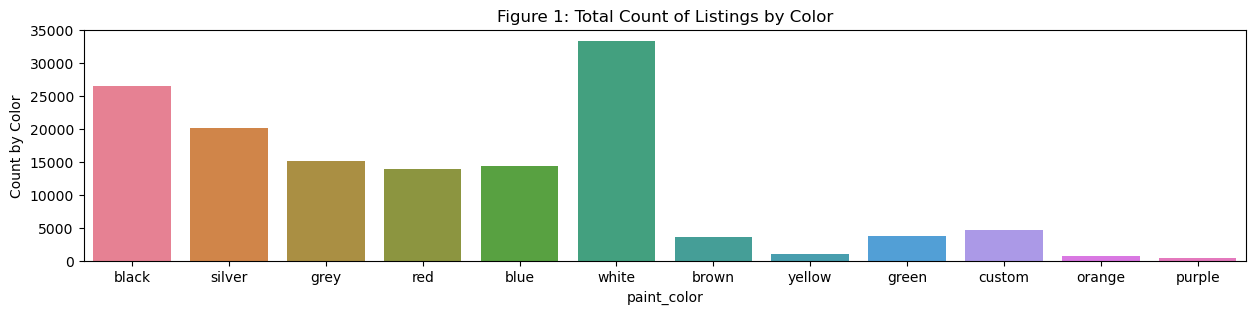

In [163]:

# count by color group:
plt.figure(figsize=(15,3))
sns.countplot(data=df, x='paint_color', hue='paint_color')
plt.title('Figure 1: Total Count of Listings by Color')
plt.ylabel('Count by Color')
plt.show()

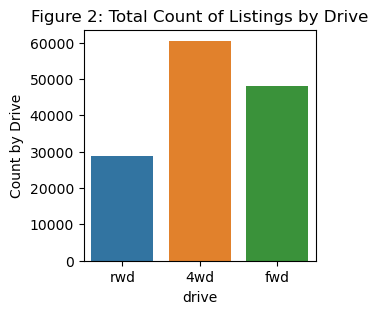

In [274]:

# count by drive group:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='drive', hue='drive')
plt.title('Figure 2: Total Count of Listings by Drive')
plt.ylabel('Count by Drive')
plt.show()

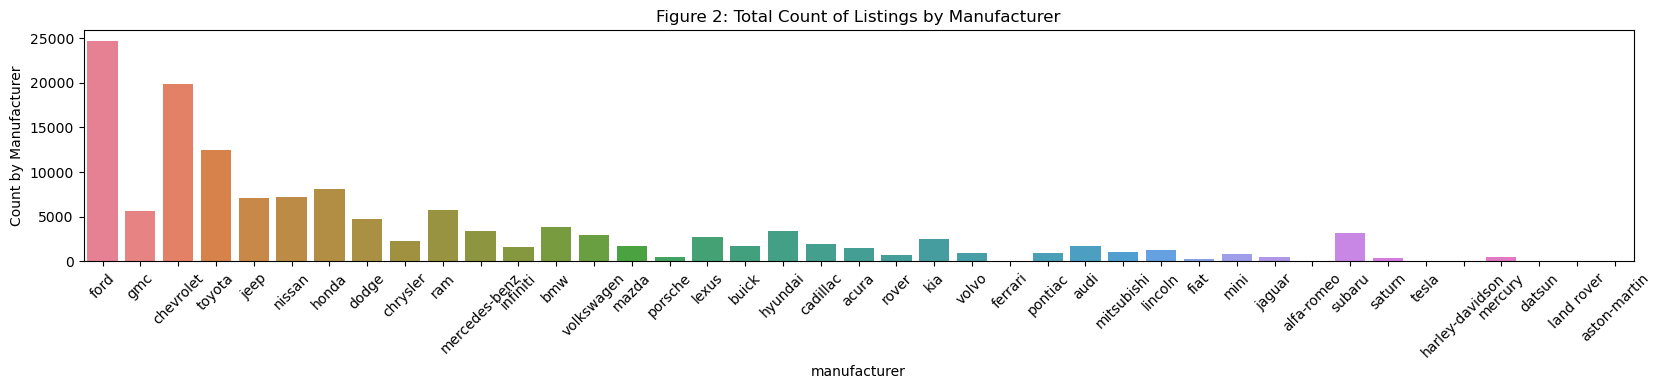

In [167]:
# count by manufacturer group:
plt.figure(figsize=(20,3))
sns.countplot(data=df, x='manufacturer', hue='manufacturer')
plt.title('Figure 2: Total Count of Listings by Manufacturer')
plt.ylabel('Count by Manufacturer')
plt.xticks(rotation=45)
plt.show()

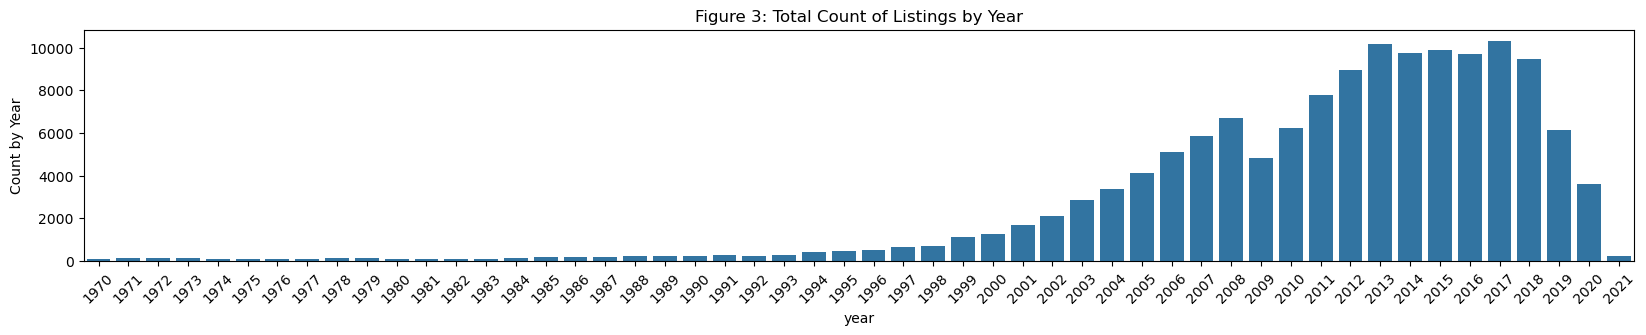

In [173]:

# count by year group:
plt.figure(figsize=(20,3))
sns.countplot(data=df, x='year')
plt.title('Figure 3: Total Count of Listings by Year')
plt.ylabel('Count by Year')
plt.xticks(rotation=45)
plt.show()

In [175]:

# save the file to a csv file after cleaning for further visulization analysis using Tableau:
df.to_csv('vehicles_clean.csv', index= False)


#### Part 3 conclusions: 
* White color of vehicle has the most number of listings, 4wd - Four wheel drive is the most popular drive type, followed by fwd - front wheel drive)

# Part 4: Correlation analysis

##### In order to find out whether there are correlations between price and other non-numerical variables such as drive, color, cylinders, we will need to replace categorical name to numurical numbers for the pupose of correlation analysis.

* To replace categorical names to numerical numbers, for example:

       drive['rwd', '4wd','fwd'] -- replaced with -- drive_n [1, 3, 2]
      

In [180]:
dfn=pd.read_csv('vehicles_clean.csv', header=0)

In [182]:
dfn

,region,price,year,manufacturer,cylinders,fuel,odometer,drive,type,paint_color,state,lat,long
0,auburn,15000,2013,ford,6 cylinders,gas,128000.0,rwd,truck,black,al,32.592000,-85.518900
1,auburn,27990,2012,gmc,8 cylinders,gas,68696.0,4wd,pickup,black,al,32.590000,-85.480000
2,auburn,34590,2016,chevrolet,6 cylinders,gas,29499.0,4wd,pickup,silver,al,32.590000,-85.480000
3,auburn,35000,2019,toyota,6 cylinders,gas,43000.0,4wd,truck,grey,al,32.601300,-85.443974
4,auburn,29990,2016,chevrolet,6 cylinders,gas,17302.0,4wd,pickup,red,al,32.590000,-85.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137464,wyoming,48590,2020,cadillac,6 cylinders,gas,7701.0,fwd,other,black,wy,33.779214,-84.411811
137465,wyoming,39990,2017,infiniti,8 cylinders,gas,41664.0,4wd,other,black,wy,33.779214,-84.411811
137466,wyoming,32990,2016,infiniti,8 cylinders,gas,55612.0,rwd,other,black,wy,33.779214,-84.411811
137467,wyoming,33590,2018,lexus,6 cylinders,gas,30814.0,rwd,sedan,white,wy,33.779214,-84.411811


In [184]:
dfn.dtypes

region           object
price             int64
year              int64
manufacturer     object
cylinders        object
fuel             object
odometer        float64
drive            object
type             object
paint_color      object
state            object
lat             float64
long            float64
dtype: object

In [186]:
dfn.describe()

,price,year,odometer,lat,long
count,137469.000000,137469.000000,137469.000000,137469.000000,137469.000000
mean,17773.750198,2011.044701,101588.451171,38.634585,-94.335534
std,13732.483014,7.051118,59477.895554,5.984344,18.450910
min,2000.000000,1970.000000,501.000000,-81.838232,-159.719900
25%,7400.000000,2008.000000,53000.000000,34.969253,-110.801411
50%,13800.000000,2013.000000,99095.000000,39.444084,-88.105874
75%,25590.000000,2016.000000,142000.000000,42.402459,-80.406800
max,289995.000000,2021.000000,299999.000000,82.252826,139.691700


In [244]:

# Remove string from column cylinders:
dfn['cylinders'] = dfn['cylinders'].astype(str)
dfn['cylinders'] = dfn['cylinders'].str.replace(' cylinders', '', regex=False)
dfn['cylinders'] = dfn['cylinders'].str.replace('other', '13', regex=False)
dfn['cylinders'] = dfn['cylinders'].astype(int)
dfn.cylinders.unique()


array([ 6,  8,  4,  5, 10,  3, 13, 12])

In [256]:
# add a column age, calculate the age of the vehicle by substracting model year from current year when the data was collected:
dfn['age'] = 2022 - dfn['year'] 
dfn.age.unique()


array([ 9, 10,  6,  3, 11,  5,  4, 18, 21,  8, 19, 14, 15,  2, 16, 17, 12,
       13, 20, 27, 48, 26, 22, 23,  7, 25, 24, 50,  1, 28, 43, 38, 46, 31,
       29, 32, 44, 40, 36, 34, 37, 33, 41, 30, 49, 47, 51, 35, 42, 45, 52,
       39], dtype=int64)

In [258]:
# Ensure 'drive' is a string column:
dfn['drive'] = dfn['drive'].astype(str)

# Replace the values using a dictionary:
dfn['drive'] = dfn['drive'].replace({'rwd': '1', '4wd': '3', 'fwd': '2'})

# Convert 'drive' back to integer:
dfn['drive'] = dfn['drive'].astype(int)

# Check the unique values in the 'drive' column:
print(dfn['drive'].unique())


[1 3 2]


In [260]:
dfn=dfn.dropna()

In [262]:
dfn.to_csv('clean.csv')

### EDA

In [264]:
dfn.head()

,region,price,year,manufacturer,cylinders,fuel,odometer,drive,type,paint_color,state,lat,long,age
0,auburn,15000,2013,ford,6,gas,128000.0,1,truck,black,al,32.5920,-85.518900,9
1,auburn,27990,2012,gmc,8,gas,68696.0,3,pickup,black,al,32.5900,-85.480000,10
2,auburn,34590,2016,chevrolet,6,gas,29499.0,3,pickup,silver,al,32.5900,-85.480000,6
3,auburn,35000,2019,toyota,6,gas,43000.0,3,truck,grey,al,32.6013,-85.443974,3
4,auburn,29990,2016,chevrolet,6,gas,17302.0,3,pickup,red,al,32.5900,-85.480000,6


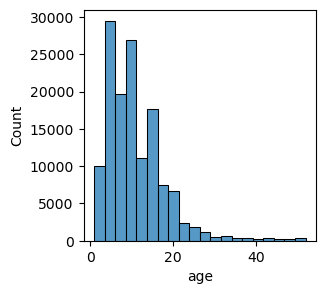

In [270]:
plt.figure(figsize=(3, 3))
sns.histplot(dfn['age'], kde=False, bins=20)
# Show the plot
plt.show()


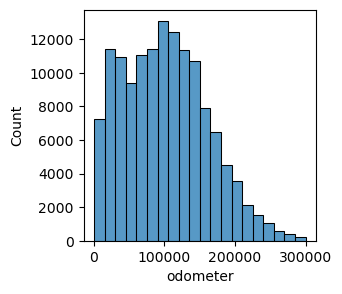

In [272]:
plt.figure(figsize=(3, 3))
sns.histplot(dfn['odometer'], kde=False, bins=20)
plt.show()

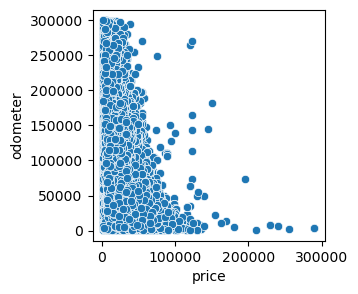

<Figure size 300x300 with 0 Axes>

In [240]:

sns.scatterplot(data=dfn, x='price',y='odometer')
plt.show()
plt.figure(figsize=(3,3))

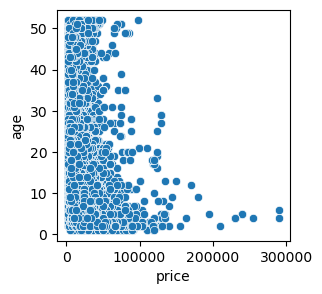

<Figure size 300x300 with 0 Axes>

In [242]:
sns.scatterplot(data=dfn, x='price',y='age')
plt.show()
plt.figure(figsize=(3,3))

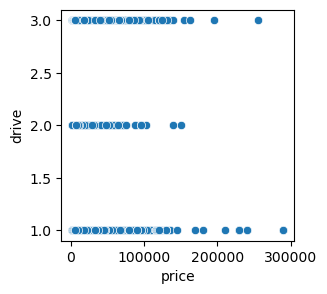

<Figure size 300x300 with 0 Axes>

In [209]:
sns.scatterplot(data=dfn, x='price',y='drive')
plt.show()
plt.figure(figsize=(3,3))

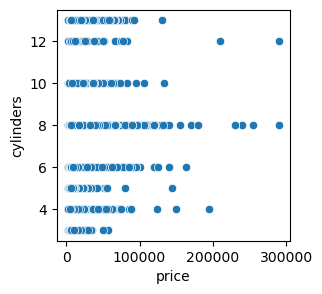

<Figure size 300x300 with 0 Axes>

In [211]:
sns.scatterplot(data=dfn, x='price',y='cylinders')
plt.show()
plt.figure(figsize=(3,3))

##### It seems like there is some negative relationship between price and odometer and age. let's use heatmap to show the strength of the relationship.

<Figure size 300x300 with 0 Axes>

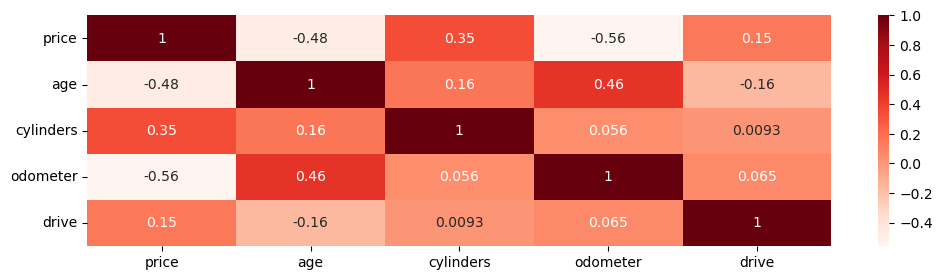

In [214]:
# Create a heatmap to visulize the correlations:
corr = dfn[['price','age','cylinders','odometer','drive']]
plt.figure(figsize=(12,3))
sns.heatmap(corr.corr(), annot=True, cmap='Reds')
#plt.title('Figure 4: Correlation Heatmap')
plt.show()

#### Part 4 Conclusion:
* Correlation analysis suggested:
  
  * a negative linear relationship between price(the dependent variable) and the explanatory variables: odometer, age.

  * a positive linear relationship between price and cylinders and drive.

# Part 5: Inferential analysis


In [218]:
model1 = smf.ols("price ~ odometer", data=dfn).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                 6.237e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:14:53   Log-Likelihood:            -1.4791e+06
No. Observations:              137469   AIC:                         2.958e+06
Df Residuals:                  137467   BIC:                         2.958e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.088e+04     60.800    507.849      0.0

In [220]:
model2 = smf.ols("price ~ age", data=dfn).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.230
Model:                            OLS   Adj. R-squared:                  0.230
Method:                 Least Squares   F-statistic:                 4.103e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:14:54   Log-Likelihood:            -1.4868e+06
No. Observations:              137469   AIC:                         2.974e+06
Df Residuals:                  137467   BIC:                         2.974e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     2.8e+04     60.057    466.269      0.0

In [222]:
model3 = smf.ols('price ~ age + odometer', data=dfn).fit()

print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.374
Method:                 Least Squares   F-statistic:                 4.111e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:14:55   Log-Likelihood:            -1.4726e+06
No. Observations:              137469   AIC:                         2.945e+06
Df Residuals:                  137466   BIC:                         2.945e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.383e+04     63.242    534.862      0.0

In [224]:
model4 = smf.ols('price ~ age + odometer + cylinders', data=dfn).fit()

print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 5.673e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:14:56   Log-Likelihood:            -1.4494e+06
No. Observations:              137469   AIC:                         2.899e+06
Df Residuals:                  137465   BIC:                         2.899e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.415e+04     99.428    142.363      0.0

In [226]:
model5 = smf.ols('price ~ age + odometer + drive + cylinders', data=dfn).fit()

print(model5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.568
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                 4.511e+04
Date:                Sun, 23 Feb 2025   Prob (F-statistic):               0.00
Time:                        10:14:56   Log-Likelihood:            -1.4472e+06
No. Observations:              137469   AIC:                         2.894e+06
Df Residuals:                  137464   BIC:                         2.894e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9361.4145    120.706     77.556      0.0

## Part 5 Conclusions:
* r2 for 5 models:
  * model 1: 0.312
  * model 2: 0.230
  * model 3: 0.374
  * model 4: 0.553
  * model 5: 0.568

* Model 5 has a highest R squared value (0.568), meaning it can explain the dependence variable better compared to other models.
      

# Concluding Remarks:
* Descriptive data analysis shows pupular features or market trends inlude: white color, four wheel drive, followed by front wheel drive. Ford is the most pupular brand.
  
* Correlation analysis suggested a weak positive correlation between price(dependent variable) and drive type(independent variable), a negative correlation between price(dependent variable) and age and odometer(independent variables).
* Inferential analysis suggested Model 5 (odometer + age + cylinders + drive) is the best model, with a R squared of 0.568, meaning the combination of odometer  + age + cylinders + drive can explain 56.8% variance in the listings.